In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

In [2]:
# Import dataset
df = pd.read_excel('dataset.xlsx')

In [3]:
df.head()

,No,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
df.dtypes

No                                       int64
transaction date                       float64
house age                              float64
distance to the nearest MRT station    float64
number of convenience stores             int64
latitude                               float64
longitude                              float64
house price of unit area               float64
dtype: object

In [5]:
# Explore the dataset
def explore_data(df):
    # check the shape of the dataframe
    print('The number of rows and columns are: ' + str(df.shape))
    print('-'*50)
    
    # List of columns
    print('Column names')
    print(list(df.columns))
    print('-'*50)
    
    # check the head and tail of the dataframe
    print('Some entries from the begining')
    print(df.head(5))
    print('-'*50)
    print('Some entries from the bottom')
    print(df.tail(5))
    print('-'*50)
    
    # information of the dataset
    print(df.info())
    print('-'*50)
    
    # Some statistical information
    print(df.describe().transpose())
    print('-'*50)

In [6]:
explore_data(df)

The number of rows and columns are: (414, 8)
--------------------------------------------------
Column names
['No', 'transaction date', 'house age', 'distance to the nearest MRT station', 'number of convenience stores', 'latitude', 'longitude', 'house price of unit area']
--------------------------------------------------
Some entries from the begining
   No  transaction date  house age  distance to the nearest MRT station  \
0   1       2012.916667       32.0                             84.87882   
1   2       2012.916667       19.5                            306.59470   
2   3       2013.583333       13.3                            561.98450   
3   4       2013.500000       13.3                            561.98450   
4   5       2012.833333        5.0                            390.56840   

   number of convenience stores  latitude  longitude  house price of unit area  
0                            10  24.98298  121.54024                      37.9  
1                             9 

In [7]:
# # check for missing data
df.isna().sum()

No                                     0
transaction date                       0
house age                              0
distance to the nearest MRT station    0
number of convenience stores           0
latitude                               0
longitude                              0
house price of unit area               0
dtype: int64

In [8]:
#We get rid of many columns. Now check the seven columns which we will use as the feature matrix to 
#predict the price. Check the data distribution of each independent variable and the dependent variable.

def data_visualisation(df):
    fig = plt.figure(constrained_layout=True, figsize=(15,15))
    gs = GridSpec(3, 3, figure=fig)
    ax1 = fig.add_subplot(gs[0, 0])
    sns.distplot(df['transaction date'], bins= 50)
    
    ax2 = fig.add_subplot(gs[0, 1])
    sns.distplot(df['house age'], bins= 50)
    
    ax3 = fig.add_subplot(gs[0, 2])
    sns.distplot(df['distance to the nearest MRT station'], bins= 50)
    
    ax4 = fig.add_subplot(gs[1, 0])
    sns.distplot(df['number of convenience stores'], bins= 50)
    
    ax5 = fig.add_subplot(gs[1, 1])
    sns.distplot(df['latitude'], bins= 50)
    
    ax6 = fig.add_subplot(gs[1, 2])
    sns.distplot(df['longitude'], bins= 50)
    
    ax8 = fig.add_subplot(gs[2, -1])
    sns.distplot(df['house price of unit area'], bins= 50)

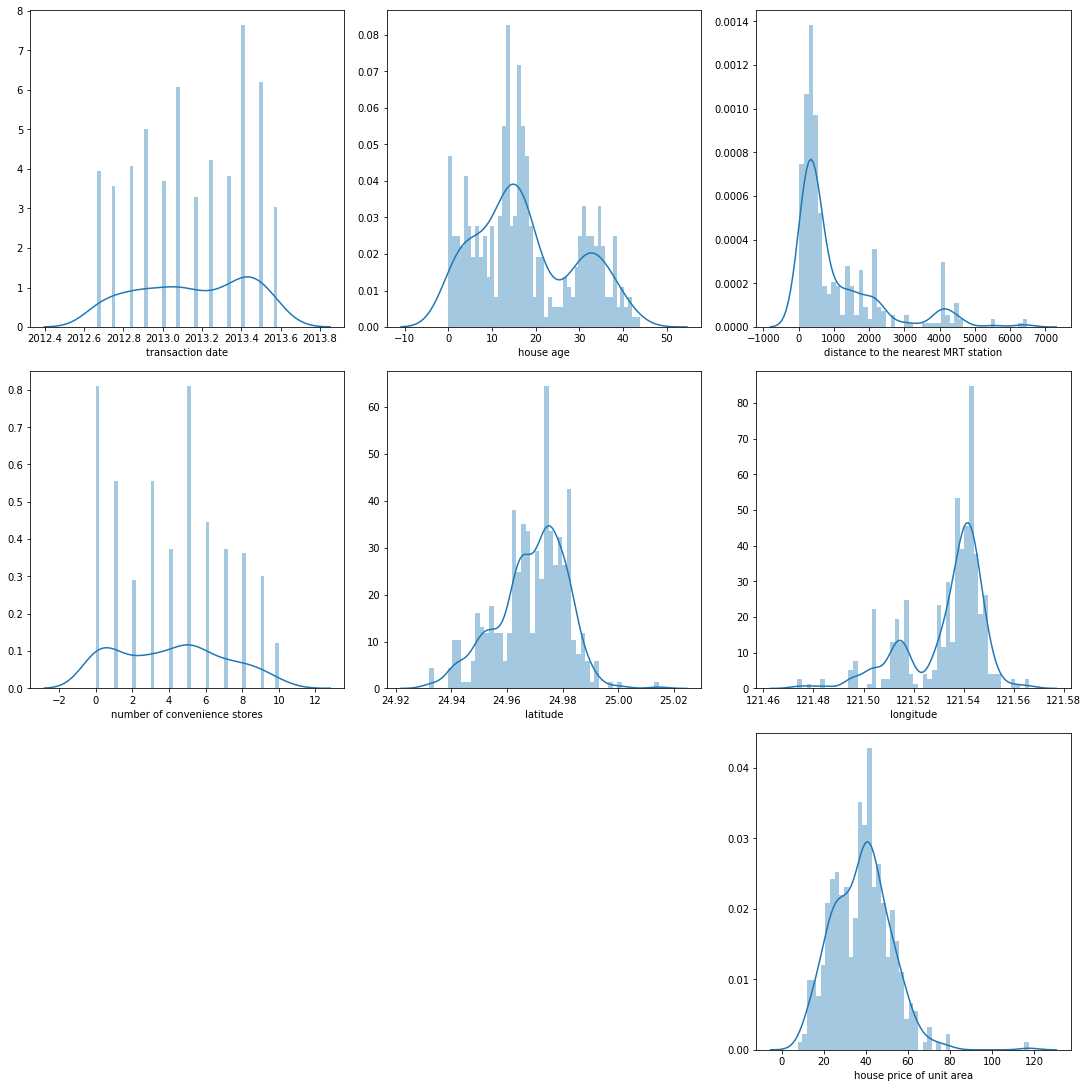

In [9]:
%matplotlib inline
data_visualisation(df)

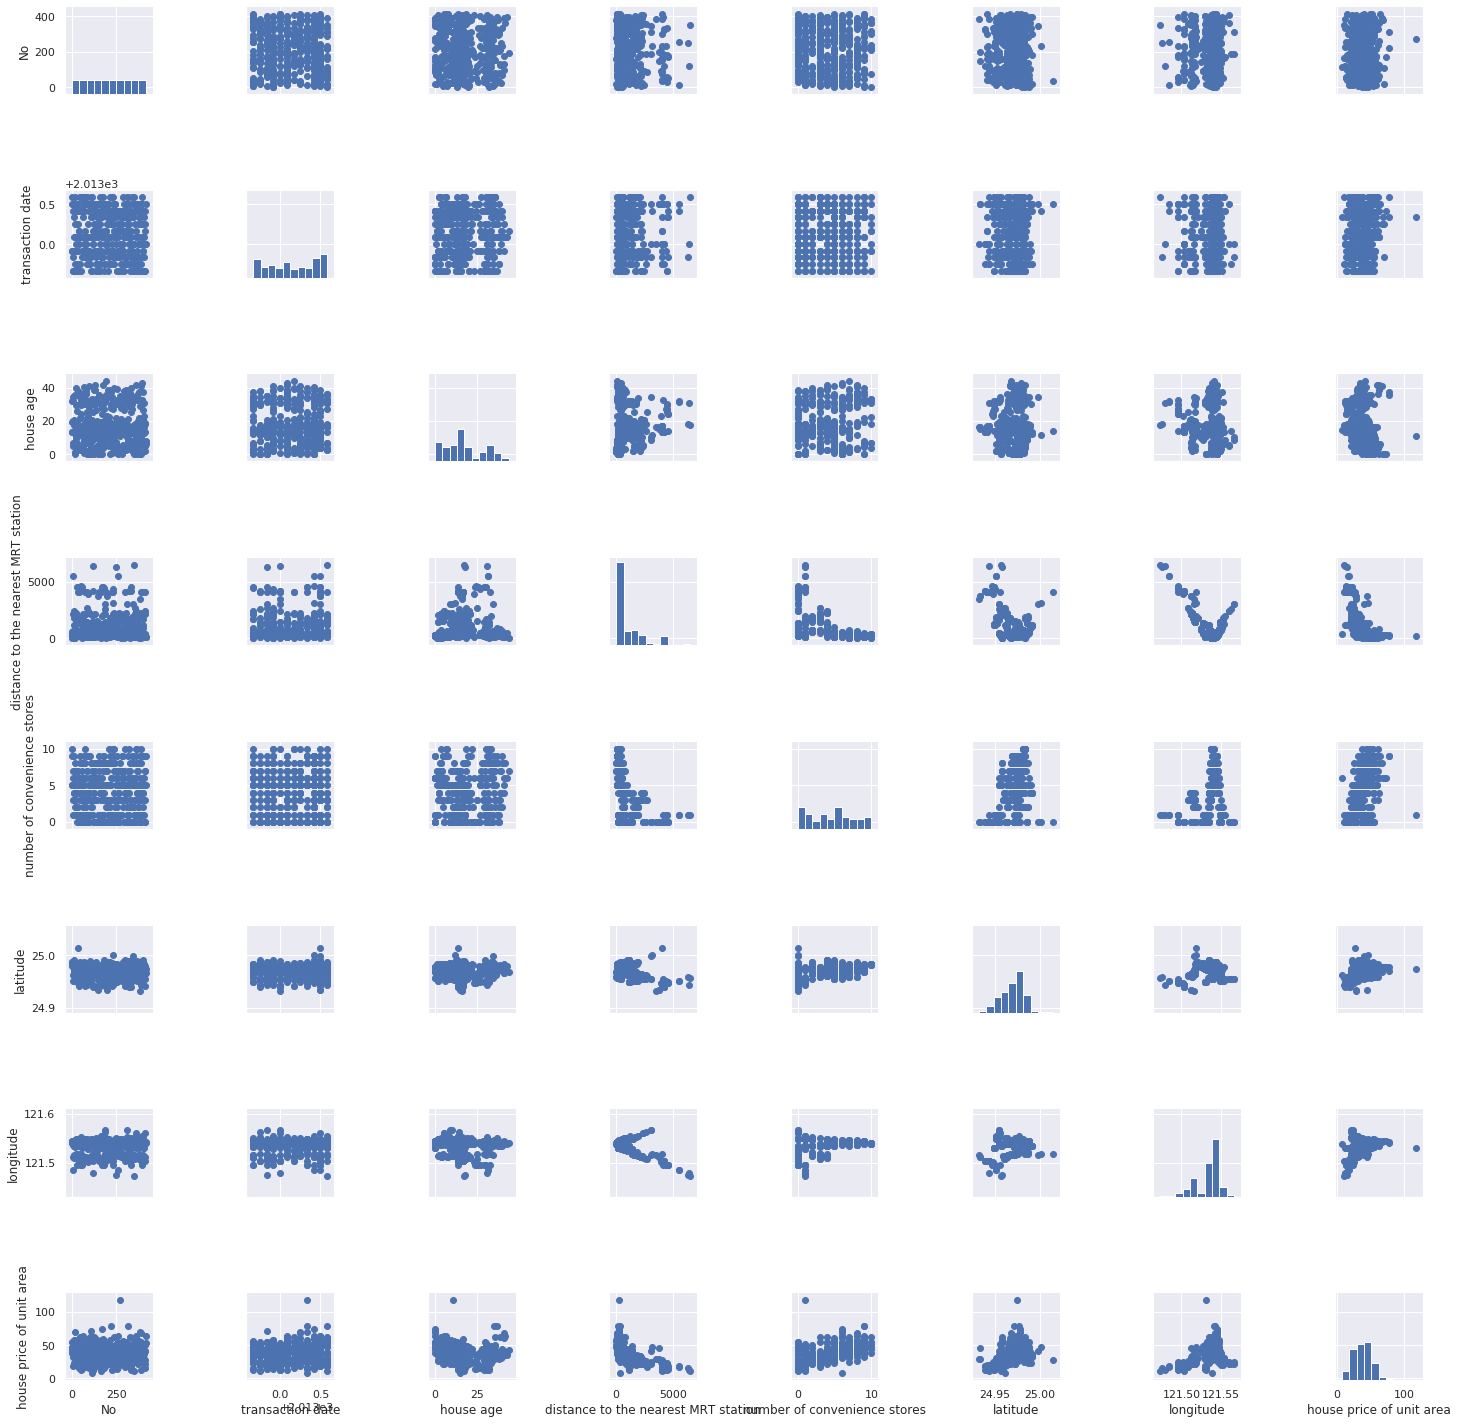

In [10]:
#We check the pairwise distribution for each variable
sns.set()
g = sns.PairGrid(df)
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)

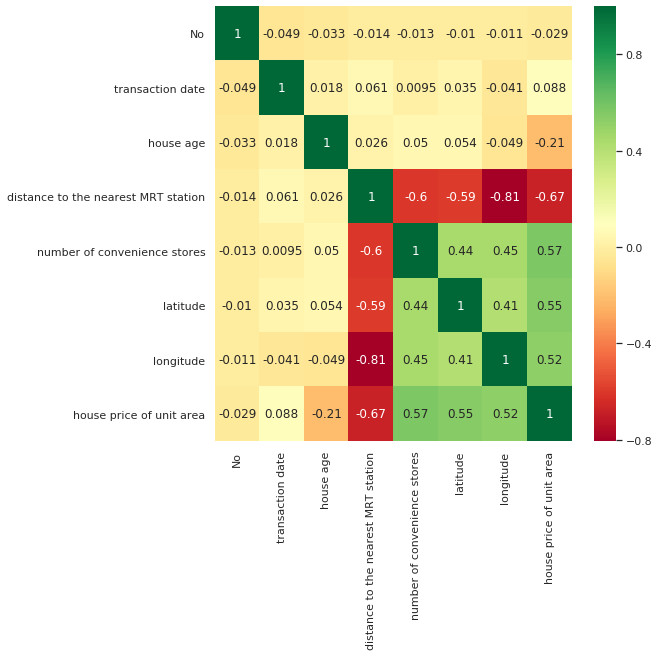

In [11]:
# correlation matrix with sns heatmap
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')

In [12]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

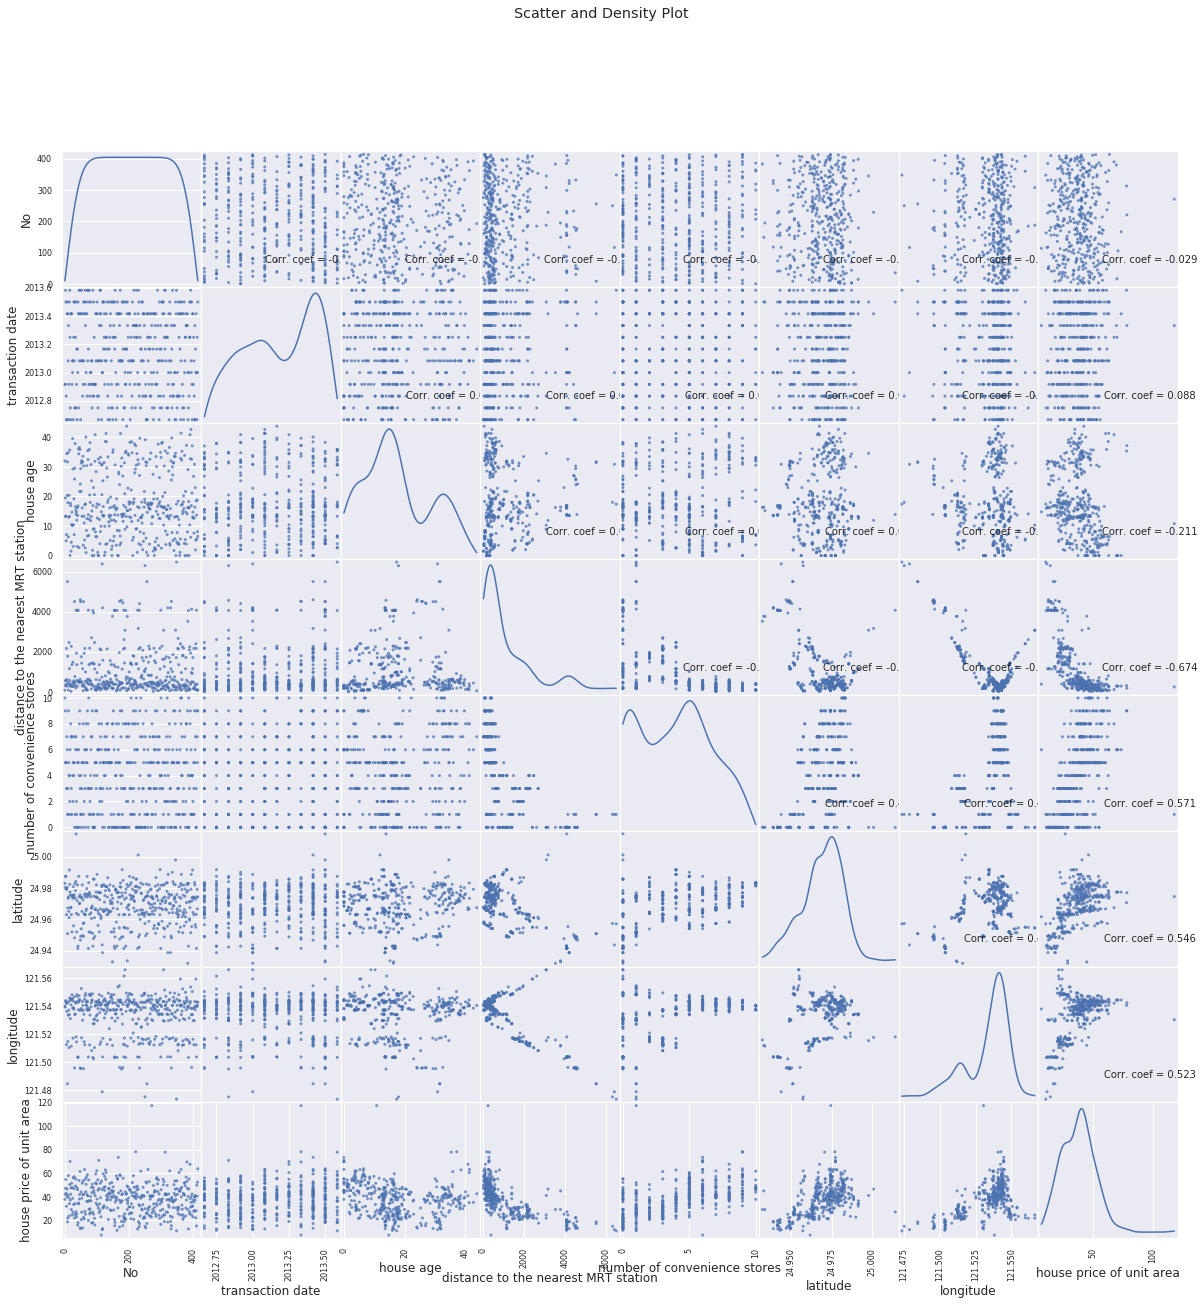

In [13]:
plotScatterMatrix(df, 20, 10)

In [14]:
# independent variable
X = df.iloc[:,:-1].values
# dependent variable
y = df.iloc[:,-1].values

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import (mean_squared_error, r2_score, explained_variance_score)

In [16]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (331, 7)
Training Labels Shape: (331,)
Testing Features Shape: (83, 7)
Testing Labels Shape: (83,)


In [18]:
# Fitting the training set into the regressor
rf_regressor = RandomForestRegressor(criterion='mse',random_state=42, n_estimators=500, n_jobs=-1, max_features='sqrt')

In [19]:
# fitting the x_train and y_train
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [20]:
# Predicting the traning set
rf_pred = rf_regressor.predict(X_test)

Text(0.5, 0, 'Predicted price')

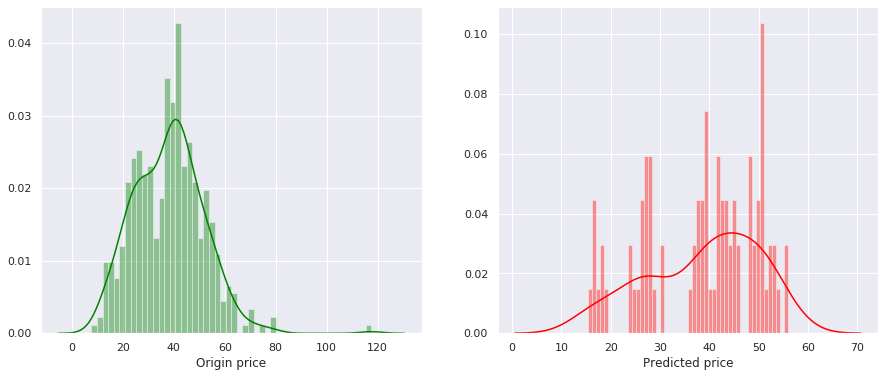

In [21]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(df['house price of unit area'], bins=50, color='green')
plt.xlabel('Origin price')
plt.subplot(1,2,2)
sns.distplot(rf_pred, bins=50, color='red')
plt.xlabel('Predicted price')

In [22]:
rf_pred, y_test

(array([53.0096, 17.4814, 45.7504, 18.2438, 37.4282, 41.3642, 45.0056,
        37.9312, 55.8684, 43.0566, 45.0018, 30.1306, 36.7834, 43.9858,
        53.827 , 47.9532, 39.7454, 50.3108, 41.0582, 42.9298, 51.053 ,
        27.5068, 35.8116, 49.408 , 50.772 , 42.672 , 43.0476, 25.2824,
        48.463 , 23.7224, 42.2202, 28.3312, 49.9224, 47.9512, 41.73  ,
        28.0226, 48.8118, 27.1766, 50.9864, 15.333 , 50.3396, 36.546 ,
        27.8684, 49.917 , 16.8782, 38.9398, 39.6884, 16.7178, 26.5976,
        50.5608, 55.9494, 38.2544, 44.7278, 18.6156, 27.97  , 37.4306,
        50.4554, 38.9256, 44.3278, 27.073 , 39.0602, 52.5622, 38.1268,
        52.3462, 43.1524, 25.0242, 17.7922, 26.5374, 53.0128, 41.8652,
        24.1118, 51.1978, 45.9918, 27.2518, 41.792 , 30.1118, 27.7472,
        16.2678, 49.5216, 38.6062, 48.2674, 26.5774, 39.3154]),
 array([45.3, 14.4, 46. , 15.6, 50.2, 38.1, 48.5, 41.4, 51.6, 40.1, 42. ,
        42.4, 28.5, 39.1, 53.7, 36.8, 40.6, 55.2, 39.3, 44.3, 53.5, 25.3,
       

In [23]:
# Calculate the absolute errors
errors = abs(rf_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 4.59 degrees.


In [24]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 87.18 %.


In [25]:
# Visualizing a Single Decision Tree
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

In [26]:
# Import tools needed for visualization
# Limit depth of tree to 3 levels
#rf_small = RandomForestRegressor(n_estimators=10, max_depth = 7)
#rf_small.fit(X_train, y_train)

# Extract the small tree
#tree_small = rf_small.estimators_[5]

# Save the tree as a png image
#export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = X, rounded = True, precision = 1)
#S
#(graph, ) = pydot.graph_from_dot_file('small_tree.dot')

#graph.write_png('small_tree.png');

In [27]:
# mean squared error
mean_squared_error(y_test, rf_pred)

42.75740586698783

In [28]:
# r2 score
r2_score(y_test, rf_pred)

0.7538419755621146

In [29]:
# Applying grid search for hyperparameter tunning
from sklearn.model_selection import GridSearchCV

In [30]:
parameters = [{'n_estimators': [300, 400, 500, 600, 700,800,900], 'max_features': ['auto', 'sqrt', 'log2']}]

In [31]:
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=parameters, scoring='neg_mean_squared_error',
                        n_jobs=-1,cv=10)

In [32]:
grid_search = grid_search.fit(X_train, y_train)

/home/benprano/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [33]:
 grid_search.best_params_

{'max_features': 'sqrt', 'n_estimators': 500}

In [34]:
from sklearn.svm import SVR

In [35]:
#kernel= 'rbf', C= 1e3, gamma= 0.1)

In [50]:
clf = SVR(gamma='scale', C=1.0, epsilon=0.2)

In [51]:
clf.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [52]:
predictor = clf.predict(X_test)

In [53]:
predictor.shape, y_test.shape

((83,), (83,))

In [54]:
print(predictor), print(y_test)

[43.56534709 20.45916911 42.78808267 20.52220152 43.95837214 41.16982105
 44.10235228 42.17979657 43.29709035 42.16903215 43.31354497 42.80482644
 43.66787717 44.1652531  43.19608574 40.11490978 41.20016284 44.0004764
 41.37591651 43.92743521 44.48127623 32.21376386 35.70636469 43.20514334
 41.72521097 42.21711519 41.67297961 28.5665759  42.02862571 21.78848946
 42.71475817 37.69195328 43.33132843 40.5068922  41.60125873 32.05456811
 44.31200699 30.20053797 42.41842501 23.80969787 42.51520806 40.75643362
 30.71018963 44.29545985 20.54257707 42.41025301 40.89618321 20.61848487
 27.06088218 44.73657763 44.35183434 40.06156537 43.06102819 33.05124196
 32.16530472 40.44228196 42.11950453 41.41937906 43.41499384 37.67481853
 40.04791637 44.48171422 41.81129044 43.26865757 43.98974645 25.28889033
 20.47388441 31.40497184 42.39108456 41.3897522  35.90263754 42.33066497
 43.92372682 27.78945691 42.06065401 25.52473069 25.41341912 20.4754859
 43.00330562 36.40617585 43.22113103 32.21876681 41.6

(None, None)

Text(0.5, 0, 'Predicted price')

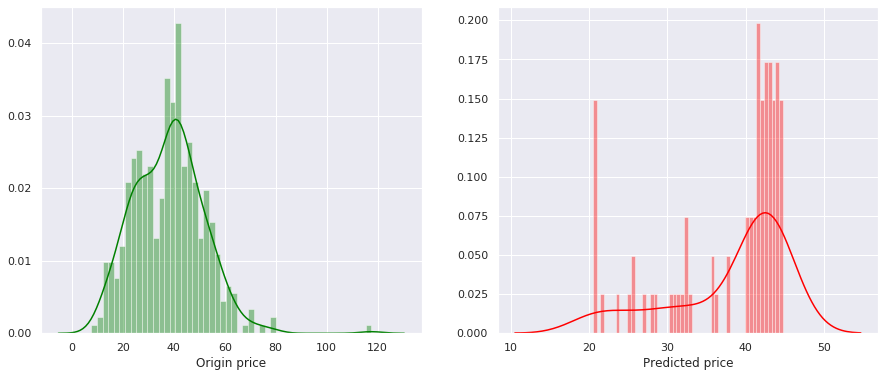

In [55]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(df['house price of unit area'], bins=50, color='green')
plt.xlabel('Origin price')
plt.subplot(1,2,2)
sns.distplot(predictor, bins=50, color='red')
plt.xlabel('Predicted price')

In [56]:
# Calculate the absolute errors
errors = abs(predictor - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 6.49 degrees.


In [57]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 80.48 %.


In [58]:
mse1 = mean_squared_error(y_test, predictor)
print(mse1)

74.48057884003062


In [59]:
#Building the optimal model by using the backward elimination
import statsmodels.formula.api as sm

In [437]:
#Adding the constant variable
X = np.append(arr=np.ones((414 , 1)).astype(int) , values= X, axis=1)

In [438]:
X_optimal = X[: ,[0,1,2,3,4,5,6,7]]
regressor_OLS = sm.OLS(endog= y, exog= X_optimal).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     81.21
Date:                Thu, 27 Jun 2019   Prob (F-statistic):           3.04e-73
Time:                        12:33:55   Log-Likelihood:                -1486.5
No. Observations:                 414   AIC:                             2989.
Df Residuals:                     406   BIC:                             3021.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.404e+04   6787.785     -2.069      0.039   -2.74e+04    -699.457
x1            -0.0036      0.004     -0.984      0.326      -0.011       0.004
x2             5.0819      1.558      3.261      0.001       2.018       8.146
x3            -0.2708      0.039     -7.026      0.000      -0.347      -0.195
x4            -0.0045      0.001     -6.289      0.000      -0.006      -0.003
x5             1.1293      0.188      6.000      0.000       0.759       1.499
x6           224.6699     44.575      5.040      0.000     137.043     312.297
x7           -14.4290     48.626     -0.297      0.767    -110.018      81.160
==============================================================================
Omnibus:                      234.131   Durbin-Watson:                   2.158
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3731.555
Skew:                           2.047   Prob(JB):                         0.00
Kurtosis:                      17.126   Cond. No.                     3.73e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.73e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [439]:
X_optimal = X[: ,[0,1,2,3,4,5,6]]
regressor_OLS = sm.OLS(endog= y, exog= X_optimal).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     94.95
Date:                Thu, 27 Jun 2019   Prob (F-statistic):           3.12e-74
Time:                        12:33:56   Log-Likelihood:                -1486.5
No. Observations:                 414   AIC:                             2987.
Df Residuals:                     407   BIC:                             3015.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.581e+04   3237.090     -4.885      0.000   -2.22e+04   -9449.339
x1            -0.0035      0.004     -0.973      0.331      -0.011       0.004
x2             5.0695      1.556      3.258      0.001       2.010       8.129
x3            -0.2705      0.038     -7.028      0.000      -0.346      -0.195
x4            -0.0044      0.000     -8.907      0.000      -0.005      -0.003
x5             1.1327      0.188      6.036      0.000       0.764       1.502
x6           226.3132     44.180      5.123      0.000     139.464     313.163
==============================================================================
Omnibus:                      235.468   Durbin-Watson:                   2.159
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3784.396
Skew:                           2.061   Prob(JB):                         0.00
Kurtosis:                      17.227   Cond. No.                     1.78e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [440]:
X_optimal = X[: ,[0,2,3,4,5,6]]
regressor_OLS = sm.OLS(endog= y, exog= X_optimal).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     113.8
Date:                Thu, 27 Jun 2019   Prob (F-statistic):           4.44e-75
Time:                        12:33:56   Log-Likelihood:                -1487.0
No. Observations:                 414   AIC:                             2986.
Df Residuals:                     408   BIC:                             3010.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.596e+04   3233.111     -4.938      0.000   -2.23e+04   -9609.168
x1             5.1376      1.554      3.305      0.001       2.082       8.193
x2            -0.2694      0.038     -7.003      0.000      -0.345      -0.194
x3            -0.0044      0.000     -8.887      0.000      -0.005      -0.003
x4             1.1362      0.188      6.056      0.000       0.767       1.505
x5           226.8794     44.173      5.136      0.000     140.044     313.715
==============================================================================
Omnibus:                      232.791   Durbin-Watson:                   2.154
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3644.283
Skew:                           2.037   Prob(JB):                         0.00
Kurtosis:                      16.952   Cond. No.                     1.77e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""